In [1]:
# Load extensions
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Importeren van bibliotheken
import math
import numpy as np
import matplotlib.pyplot as plt

from berekeningen_1piloon import Brug

plt.style.use("classic")

In [3]:
h = 0.7
#N = np.linspace(2/7, 6*2/7, num=6)
N = np.sort(np.random.uniform(0, 2, 6))
da = 1
db = 0.05

In [4]:
brug = Brug(h, da, db, N)
brug.__dict__

{'h': 0.7,
 'da': 1,
 'db': 0.05,
 'N': array([0.08431542, 0.15218688, 0.41900489, 0.90652707, 1.95445251,
        1.97847006]),
 'cosa': array([0.18844154, 0.27749488, 0.55661989, 0.80698926, 0.94408699,
        0.94529719]),
 'sina': array([0.98208441, 0.96072712, 0.83076729, 0.59056612, 0.32969646,
        0.3262104 ]),
 'P': array([0.        , 0.08431542, 0.15218688, 0.41900489, 0.90652707,
        1.95445251, 1.97847006, 2.        ]),
 'deeltje': [0.084315421214058,
  0.06787145929936722,
  0.26681800866524186,
  0.487522183507866,
  1.0479254352208704,
  0.02401755667565464,
  0.021529935416941814]}

In [5]:
brug.calc_reactie_krachten()

array([ 17.33946637,  31.29723198,  68.82888909, 253.52985201,
       417.3650113 , 220.44507628,   9.36684175,   4.42763122])

In [6]:
brug.calc_touw_kracht()

(array([ 31.86816909,  71.64249661, 305.17553304, 706.720211  ,
        668.63040401,  28.71411131]),
 array([  6.00528699,  19.88042625, 169.86677164, 570.31561786,
        631.24526573,  27.1433687 ]))

In [7]:
brug.calc_kant()

(-1424.4567371668384,
 -1049.599701070302,
 1769.3887443258088,
 0,
 -1424.4567371668384,
 [])

### Wegdek

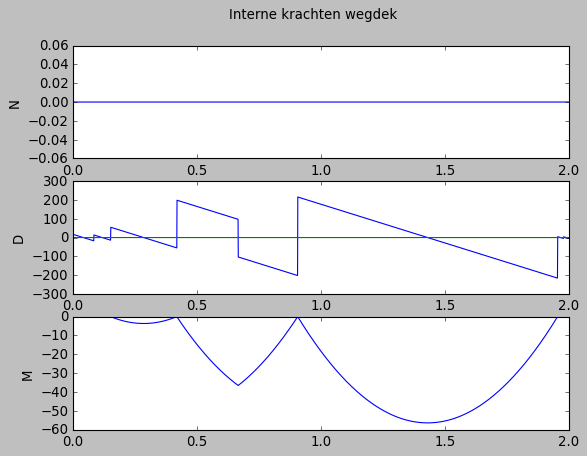

In [8]:
x = np.arange(0, 2, 0.001)
N, D, M = list(zip(*[brug.calc_intern_wegdek(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten wegdek")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2, sharex=ax1)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax2.plot(x, [0]*len(x))
ax3 = plt.subplot(3,1,3, sharex=ax1)
ax3.plot(x, [-m for m in M])
ax3.set_ylabel("M")
plt.savefig("figs/wegdek-vlot-op-zee")

### Doorbuiging wegdek

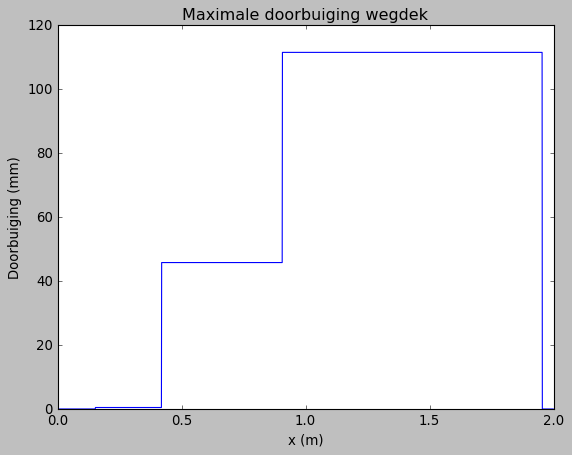

In [9]:
x = np.arange(0, 2, 0.001)
f = [brug.calc_doorbuiging_wegdek(xi)*10**3 for xi in x]

plt.plot(x, f)
plt.title("Maximale doorbuiging wegdek")
plt.xlabel("x (m)")
plt.ylabel("Doorbuiging (mm)")
plt.savefig("figs/wegdek-doorbuiging-vlot-op-zee")

### Piloon

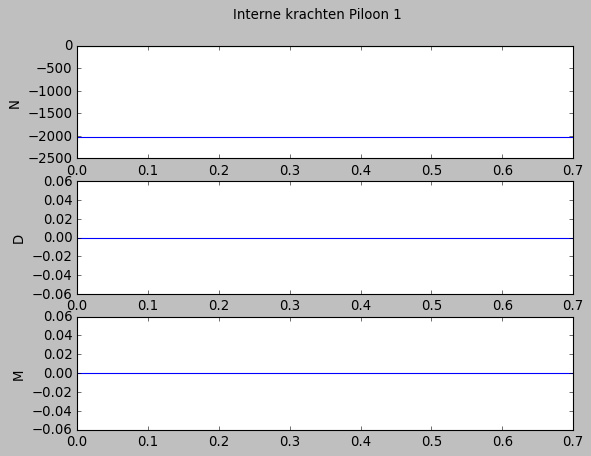

In [10]:
x = np.arange(0, brug.h, 0.001)
N, D, M = list(zip(*[brug.calc_intern_balk(xi) for xi in x]))

fig = plt.figure()
fig.suptitle("Interne krachten Piloon 1")
ax1 = plt.subplot(3,1,1)
ax1.plot(x, N)
ax1.plot(x, [0]*len(x))
ax1.set_ylabel("N")
ax2 = plt.subplot(3,1,2)
ax2.plot(x, D)
ax2.set_ylabel("D")
ax3 = plt.subplot(3,1,3)
ax3.plot(x, M)
ax3.set_ylabel("M")
plt.savefig("figs/piloon1-vlot-op-zee")

### Traagheidsmoment

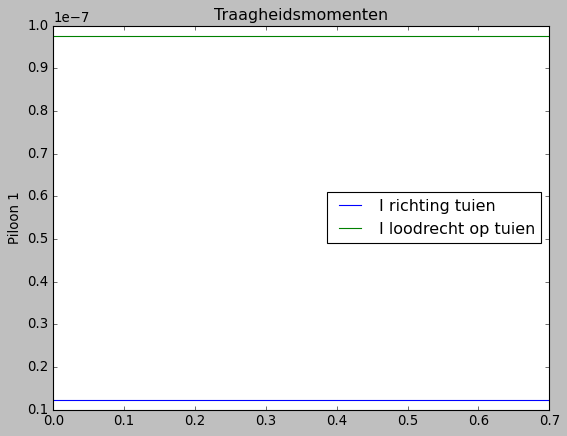

In [11]:
step = 0.001

x1 = np.arange(0, brug.h, step)
I1 = [brug.calc_piloon_I(xi, True) for xi in x1]

plt.title("Traagheidsmomenten")
plt.plot(x1, I1)
plt.ylabel("Piloon 1")
plt.legend(["I richting tuien", "I loodrecht op tuien"], loc="center right")